# Smoothing particles

In [1]:
# Libraries ----
import sys  # type: ignore
import warnings

import imageio  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append("../modules")
import plot_clustering as plt_cp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import smoothing_particles as sp  # type: ignore
import track_particles as tp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

ordering = True
video_name = "3n_3m_0f_240220_2"
n_particles = int(video_name[0])
save_figures = True
x_bounds = [0, 1080]
y_bounds = [90, 1830]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [3]:
df_tracked = pd.read_csv(
    "{}/clustered_{}.csv".format(output_path, video_name), low_memory=False
)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,1392.992611,98.366597,1386.794948,102.140121,0.0,1436.000000,48.000000,0.396078,1369.000000,121.000000,-1.528370,13939.0,188.949636,98.355839,0.853837,3,NaN,NaN,NaN,NaN,False,False,False
1,1,0,740.529012,94.748856,740.620333,96.086198,NaN,740.529012,94.748856,NaN,740.529012,94.748856,1.230544,6773.0,195.553024,65.796257,0.941697,3,NaN,NaN,NaN,NaN,False,False,False
2,2,0,1055.559921,154.116187,1060.675101,152.880249,0.0,1068.000000,112.000000,0.431373,1136.000000,140.000000,1.463195,13134.0,217.091854,80.955354,0.927868,3,NaN,NaN,NaN,NaN,False,False,False


In [4]:
df_tracked.tail(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
64608,0,89997,359.127730,21.817928,359.231827,21.803225,0.0,394.0,1.0,0.584314,394.0,0.0,1.475663,3938.0,117.679402,55.244174,0.882961,3,3.0,0.000169,-0.000169,0.000013,False,False,False
64609,1,89997,1556.785561,143.866315,1555.530747,141.031786,0.0,1616.0,48.0,0.317647,1531.0,139.0,-0.731850,14018.0,211.411260,87.984879,0.909283,3,3.0,0.026215,-0.002554,0.000097,False,False,False
64610,2,89997,1623.179108,742.574202,1620.788214,752.685261,0.0,1620.0,634.0,0.501961,1608.0,653.0,0.002119,12311.0,246.537943,72.648031,0.955598,3,3.0,0.005152,-0.025316,0.000145,False,False,False


## Swapping mixed IDs

In [5]:
omega_threshold = 20 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 83  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 10000, velocity_threshold, omega_threshold, True],
    [10000, 20000, velocity_threshold, omega_threshold, True],
    [20000, 30000, velocity_threshold, omega_threshold, True],
    [30000, 36000, velocity_threshold, omega_threshold, True]#,
    # [40000, 50000, velocity_threshold, omega_threshold, True],
    # [50000, 60000, velocity_threshold, omega_threshold, True],
    # [60000, 70000, velocity_threshold, omega_threshold, True],
    # [70000, 80000, velocity_threshold, omega_threshold, True],
    # [80000, 90000, velocity_threshold, omega_threshold, True],
    # [90000, 100000, velocity_threshold, omega_threshold, True],
    # [100000, 108000, velocity_threshold, omega_threshold, True],
    # [110000, 120000, velocity_threshold, omega_threshold, True],
    # [120000, 130000, velocity_threshold, omega_threshold, True],
    # [130000, 140000, velocity_threshold, omega_threshold, True],
    # [140000, 150000, velocity_threshold, omega_threshold, True],
    # [150000, 162000, velocity_threshold, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 83 
	- Angle: 20.0 



100%|█████████████████████████| 9/9 [00:31<00:00,  3.46s/it]


Time: 30000 Chunks 2 Allowed time 30000 Permutation [0 1 2]
Time: 60000 Chunks 2 Allowed time 60000 Permutation [0 1 2]


,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_10000,0,0,1392.992611,98.366597,1386.794948,102.140121,0.0,1436.000000,48.000000,0.396078,1369.000000,121.000000,-1.528370,-1.528370,13939.0,188.949636,98.355839,0.853837,3,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_10000,1,1,740.529012,94.748856,740.620333,96.086198,NaN,740.529012,94.748856,NaN,740.529012,94.748856,1.230544,1.230544,6773.0,195.553024,65.796257,0.941697,3,NaN,NaN,NaN,NaN,False,False,False
2,True,0,chunk_00000_10000,2,2,1055.559921,154.116187,1060.675101,152.880249,0.0,1068.000000,112.000000,0.431373,1136.000000,140.000000,1.463195,1.463195,13134.0,217.091854,80.955354,0.927868,3,NaN,NaN,NaN,NaN,False,False,False
3,True,3,chunk_00000_10000,0,0,1392.928541,98.323353,1386.825315,102.096472,0.0,1435.000000,48.000000,0.396078,1411.000000,116.000000,-1.532784,-1.532784,13994.0,189.281796,98.528312,0.853839,3,3.0,-0.021357,-0.014415,-0.001471,False,False,False
4,True,3,chunk_00000_10000,1,1,792.593829,103.008679,795.049196,102.961154,NaN,792.593829,103.008679,NaN,792.593829,103.008679,-1.381932,-1.381932,8973.0,280.045362,73.804146,0.964648,3,3.0,17.354939,2.753274,-0.050463,True,False,False
5,True,3,chunk_00000_10000,2,2,1058.815217,154.591108,1064.063856,153.496502,0.0,1119.000000,112.000000,0.427451,1057.000000,179.000000,-1.469258,-1.469258,13248.0,218.187560,81.353198,0.927888,3,3.0,1.085099,0.158307,-0.002021,False,False,False
6,True,6,chunk_00000_10000,0,0,1392.928541,98.323353,1386.825315,102.096472,0.0,1435.000000,48.000000,0.396078,1411.000000,116.000000,-1.532784,-1.532784,13994.0,189.281796,98.528312,0.853839,3,3.0,0.000000,0.000000,0.000000,False,False,False
7,True,6,chunk_00000_10000,1,1,792.593829,103.008679,795.049196,102.961154,NaN,792.593829,103.008679,NaN,792.593829,103.008679,-1.381932,-1.381932,8973.0,280.045362,73.804146,0.964648,3,3.0,0.000000,0.000000,0.000000,False,False,False


In [6]:
df_final.tail(5)

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
64606,True,89994,chunk_80000_90000,1,1,1556.706917,143.873976,1555.373327,141.038094,0.0,1616.0,48.0,0.317647,1516.0,139.0,-0.732140,-0.732140,14037.0,211.308511,88.179707,0.908767,3,3.0,0.020339,0.012564,0.000299,False,False,False
64605,True,89994,chunk_80000_90000,0,2,359.127222,21.818436,359.231436,21.803734,0.0,394.0,1.0,0.584314,394.0,0.0,1.475624,-1.475624,3938.0,117.676688,55.243455,0.882958,3,3.0,0.006499,0.004773,-0.000282,False,False,False
64610,True,89997,chunk_80000_90000,2,0,1623.179108,742.574202,1620.788214,752.685261,0.0,1620.0,634.0,0.501961,1608.0,653.0,0.002119,0.002119,12311.0,246.537943,72.648031,0.955598,3,3.0,0.005152,-0.025316,0.000145,False,False,False
64609,True,89997,chunk_80000_90000,1,1,1556.785561,143.866315,1555.530747,141.031786,0.0,1616.0,48.0,0.317647,1531.0,139.0,-0.731850,-0.731850,14018.0,211.411260,87.984879,0.909283,3,3.0,0.026215,-0.002554,0.000097,False,False,False
64608,True,89997,chunk_80000_90000,0,2,359.127730,21.817928,359.231827,21.803225,0.0,394.0,1.0,0.584314,394.0,0.0,1.475663,-1.475663,3938.0,117.679402,55.244174,0.882961,3,3.0,0.000169,-0.000169,0.000013,False,False,False


## Interpolation over not allowed frames

In [7]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:, "permuted_id"] == df_full["permuted_id"].unique()[id_]
        df_full[mask] = df_full[mask].interpolate(method="linear")

In [8]:
if ordering:
    cols = [
        "id",
        "permuted_id",
        "time",
        "position_x",
        "position_y",
        "weighted_x",
        "weighted_y",
        "darkest_v",
        "darkest_x",
        "darkest_y",
        "lightest_v",
        "lightest_x",
        "lightest_y",
        "orientation",
        "corrected_orientation",
        "area",
        "axis_major",
        "axis_minor",
        "eccentricity",
    ]
    df_temp = df_full[cols]
    df_temp.to_csv(
        "{}/interpolated_{}.csv".format(output_path, video_name), index=False
    )
    df_temp

Thresholds:
	- Velocity: 35.05657874584669 
	- Angle: 4.655726900816104 



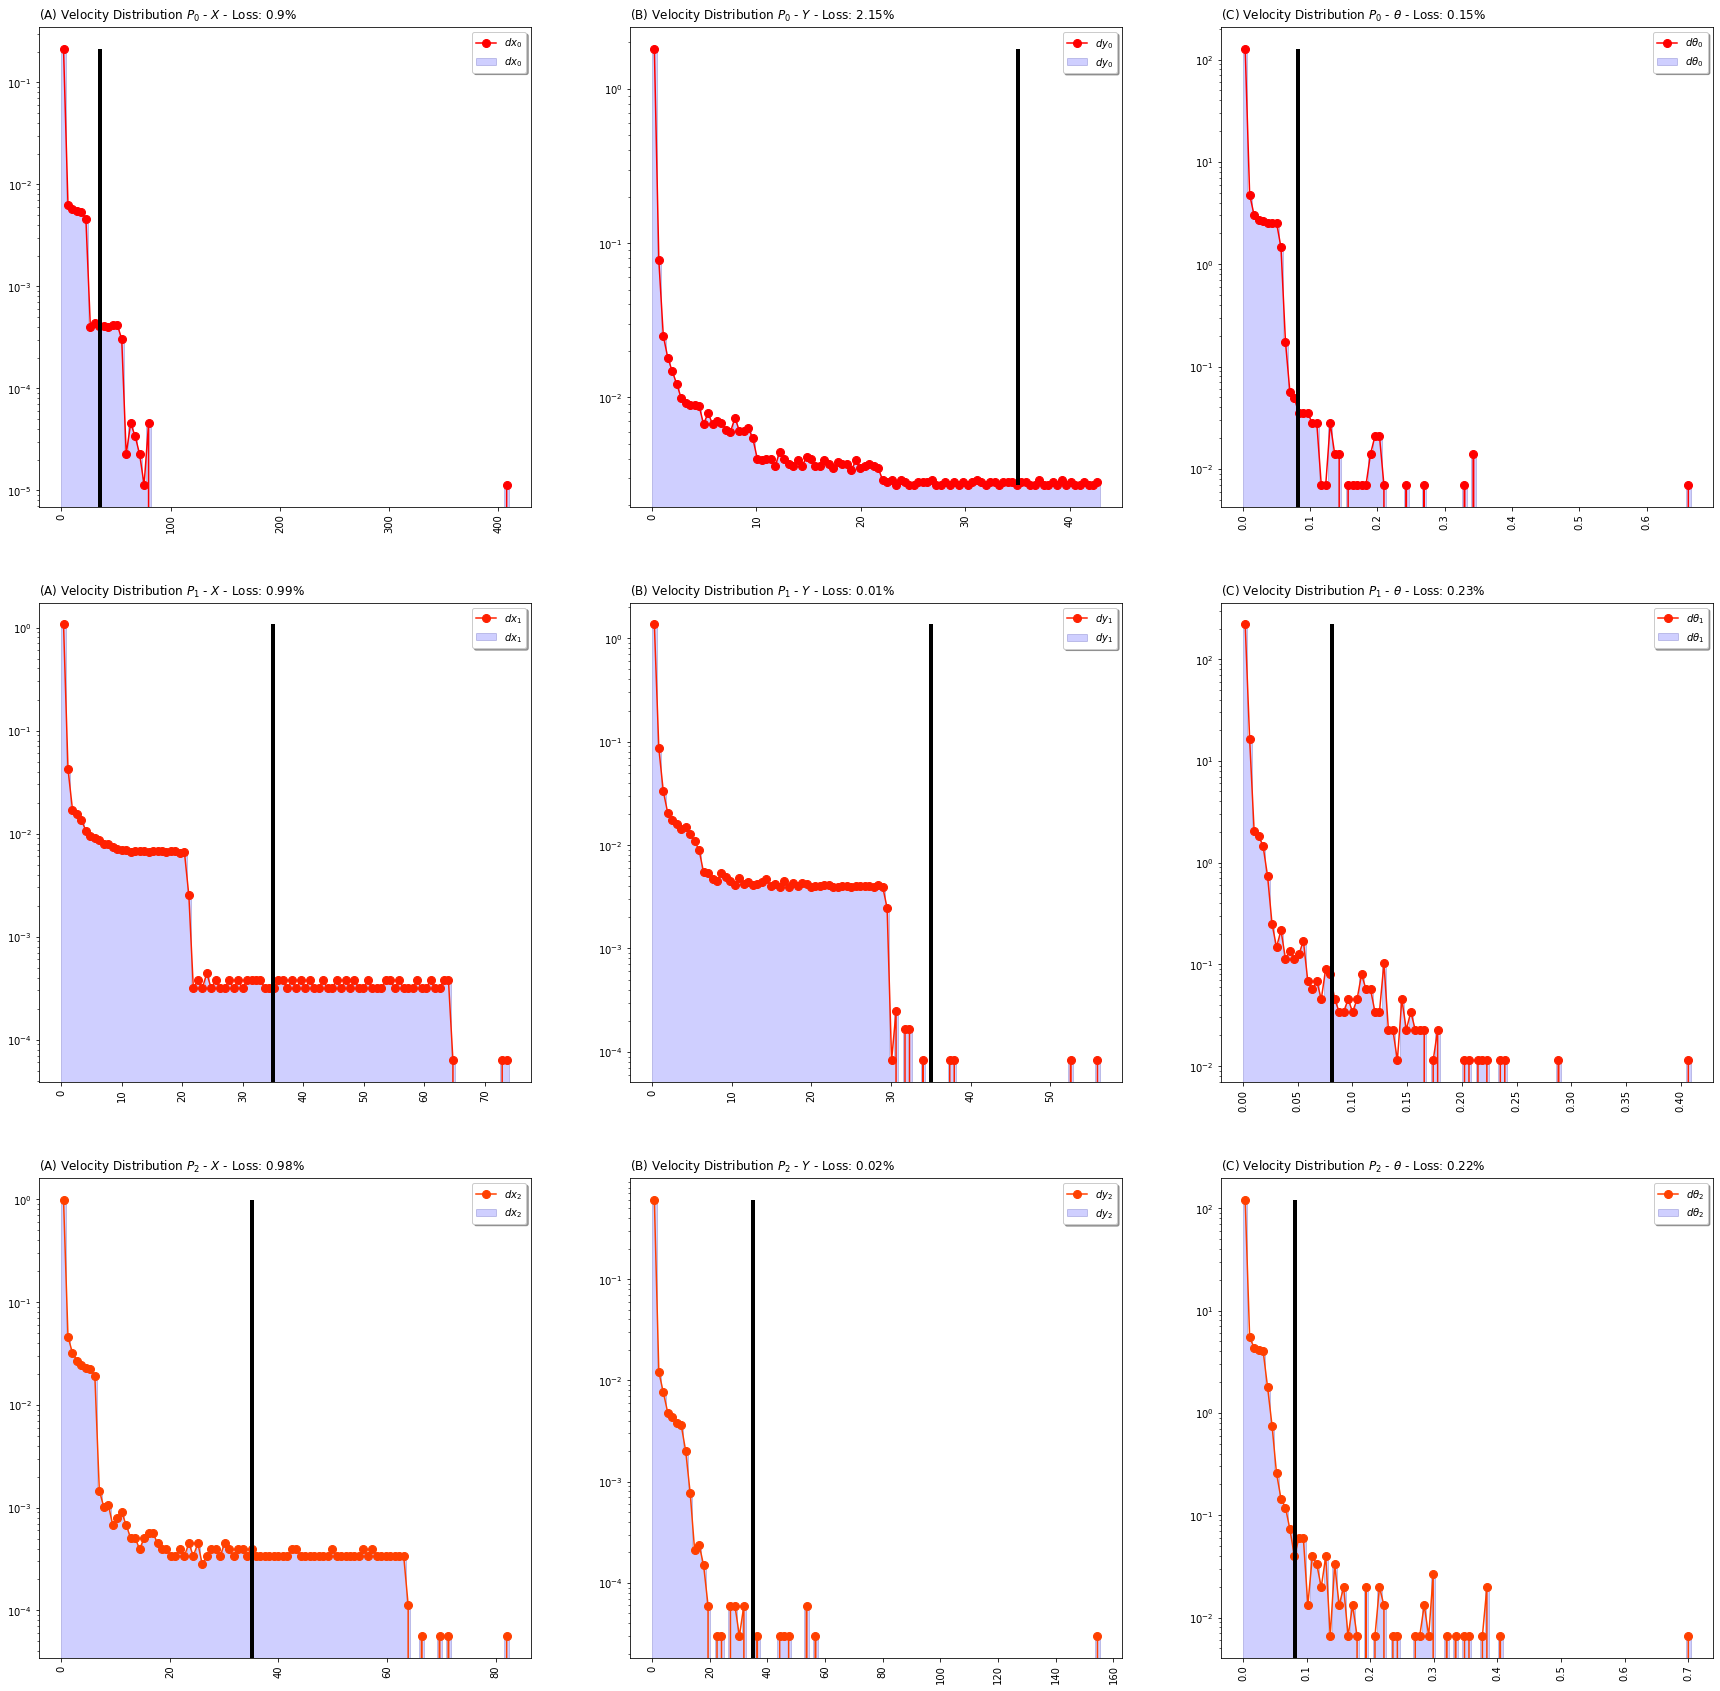

In [9]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = (
        df_full["velocity_orientation"].abs().quantile(0.9965)
    )  # Angular velocity per frame
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9901)
    )  # Velocity per frame limited with half average size of particle
    print(
        "Thresholds:\n\t- Velocity:",
        velocity_threshold,
        "\n\t- Angle:",
        omega_threshold * 180 / np.pi,
        "\n",
    )

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend,
    )

Original


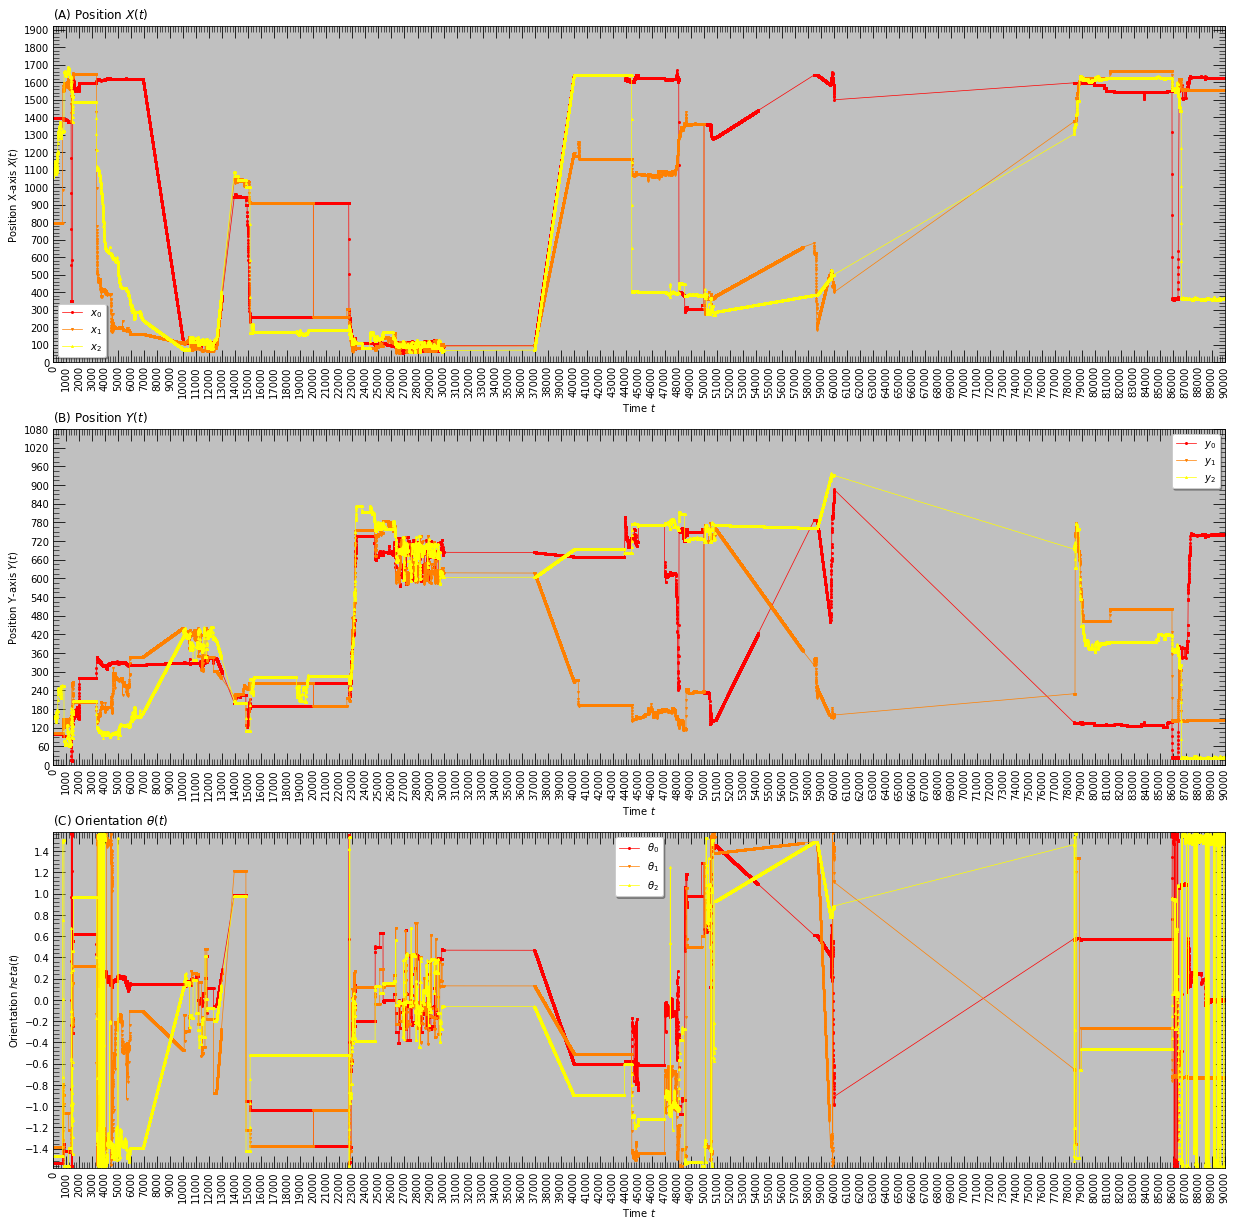

Corrected Orientation


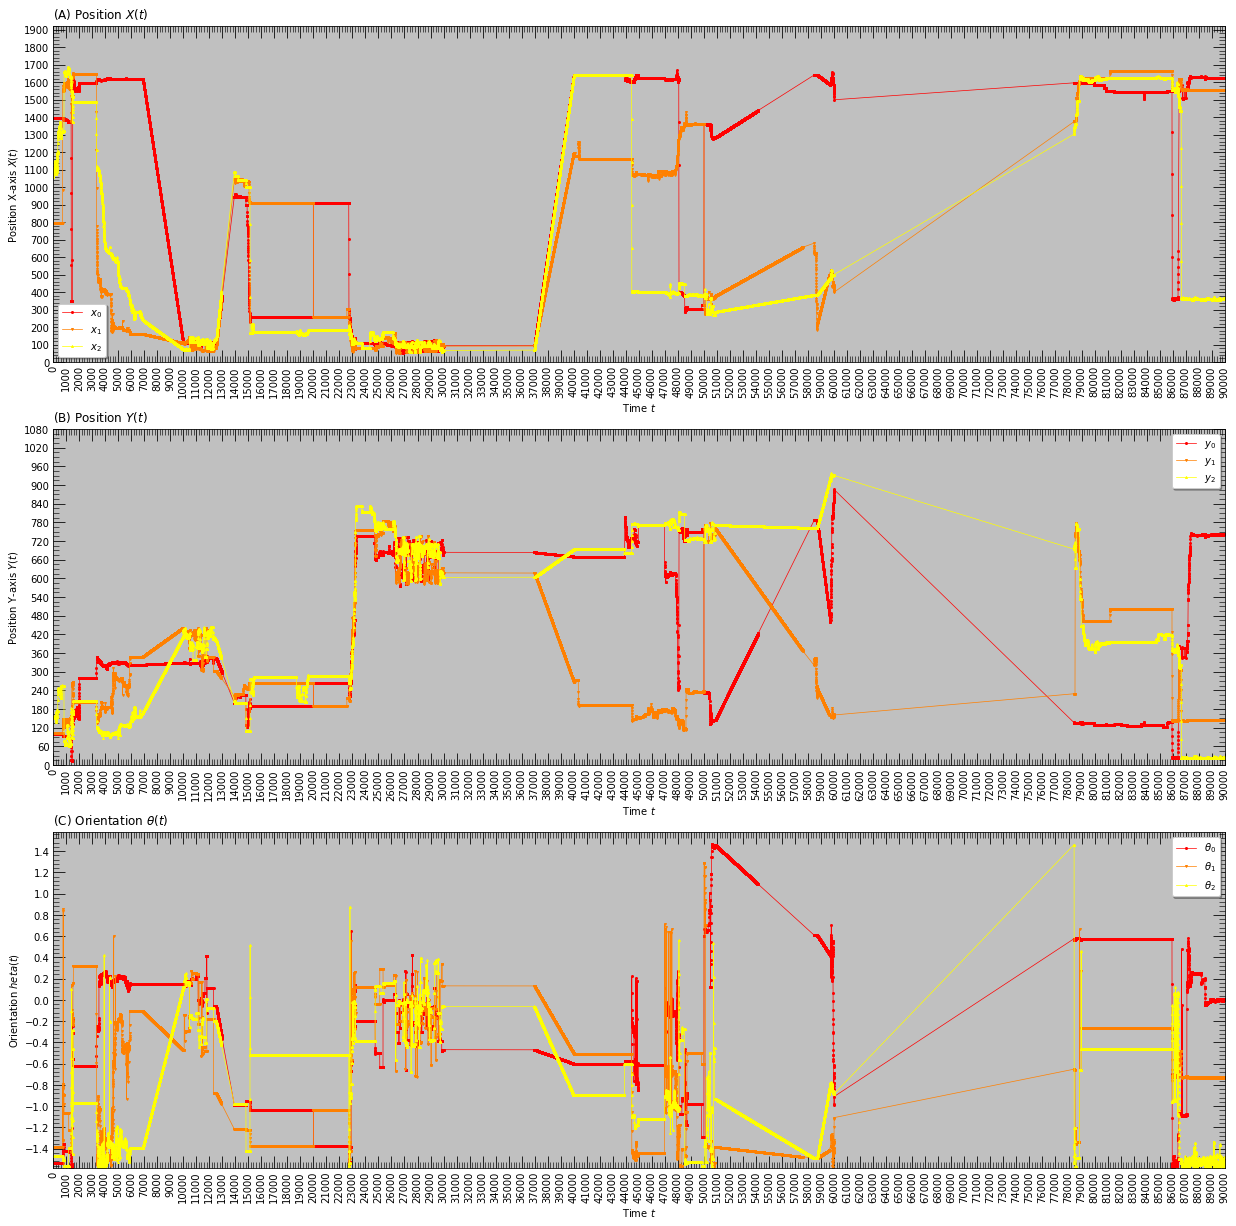

In [10]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf = 0, 90000  # 22200, 24300
    t0_, tf_ = 0, 90000  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1920], [0, 1080], [-1.58, 1.58]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9701)
    )  # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )